## CSV analysis

In [1]:
import pandas as pd
import os

sample_sub = pd.read_csv(os.path.join('Data','alg_sample_submission.csv'))
targets = pd.read_csv(os.path.join('Data','data_target_users_test.csv'))
URM = pd.read_csv(os.path.join('Data','data_train.csv'))

channel_ICM = pd.read_csv(os.path.join('Data','data_ICM_channel.csv'))
event_ICM = pd.read_csv(os.path.join('Data','data_ICM_event.csv'))
genre_ICM = pd.read_csv(os.path.join('Data','data_ICM_genre.csv'))
subgenre_ICM = pd.read_csv(os.path.join('Data','data_ICM_subgenre.csv'))

In [2]:
ICMs = { 
  'channel_ICM': channel_ICM, 
  'event_ICM': event_ICM, 
  'genre_ICM': genre_ICM, 
  'subgenre_ICM': subgenre_ICM
}

In [3]:
sample_sub

,user_id,item_list
0,0,0 1 2 3 4 5 6 7 8 9
1,1,0 1 2 3 4 5 6 7 8 9
2,2,0 1 2 3 4 5 6 7 8 9
3,3,0 1 2 3 4 5 6 7 8 9
4,4,0 1 2 3 4 5 6 7 8 9
...,...,...
13645,13645,0 1 2 3 4 5 6 7 8 9
13646,13646,0 1 2 3 4 5 6 7 8 9
13647,13647,0 1 2 3 4 5 6 7 8 9
13648,13648,0 1 2 3 4 5 6 7 8 9


In [4]:
ICMs['channel_ICM'].head()

,row,col,data
0,0,23,1.0
1,1,30,1.0
2,2,38,1.0
3,2,53,1.0
4,3,51,1.0


In [5]:
ICMs['event_ICM'].head()

,row,col,data
0,0,121781,1.0
1,1,150102,1.0
2,1,349614,1.0
3,2,9174,1.0
4,2,20833,1.0


In [6]:
ICMs['genre_ICM'].head()

,row,col,data
0,0,3,1.0
1,1,3,1.0
2,2,6,1.0
3,3,0,1.0
4,3,1,1.0


In [7]:
ICMs['subgenre_ICM'].head()

,row,col,data
0,0,70,1.0
1,1,27,1.0
2,2,40,1.0
3,3,50,1.0
4,4,62,1.0


In [8]:
targets

,user_id
0,0
1,1
2,2
3,3
4,4
...,...
13645,13645
13646,13646
13647,13647
13648,13648


In [9]:
URM

,row,col,data
0,0,53,1.0
1,0,209,1.0
2,0,223,1.0
3,0,249,1.0
4,0,435,1.0
...,...,...,...
5285659,13649,17943,1.0
5285660,13649,17961,1.0
5285661,13649,18014,1.0
5285662,13649,18043,1.0


In [10]:
n_users = len(URM["row"].unique())
n_items = len(URM["col"].unique())
n_interactions = len(URM)

print(n_users)
print(n_items)
print(n_interactions)

13650
18059
5285664


## Dataset analysis

In [11]:
from Utils.Dataset import Dataset

dataset = Dataset(path='./Data', validation_percentage=0, test_percentage=0.2)

In [12]:
print(dataset.URM_train.shape)
print(dataset.genre_ICM.shape)
print(dataset.subgenre_ICM.shape)
print(dataset.channel_ICM.shape)
print(dataset.ICM.shape)

(13650, 18059)
(18059, 8)
(18059, 113)
(18059, 213)
(18059, 5)


In [13]:
print(dataset.num_items)
print(dataset.num_users)

18059
13650


In [15]:
from scipy import sparse as sps
import numpy as np

ICM_all = sps.csr_matrix(dataset.ICM)
features_per_item = np.ediff1d(ICM_all.indptr)

ICM_all = sps.csc_matrix(ICM_all)
items_per_feature = np.ediff1d(ICM_all.indptr)

ICM_all = sps.csr_matrix(ICM_all)

In [16]:
print(features_per_item.shape)
print(items_per_feature.shape)

(18059,)
(5,)


In [17]:
features_per_item = np.sort(features_per_item)
items_per_feature = np.sort(items_per_feature)

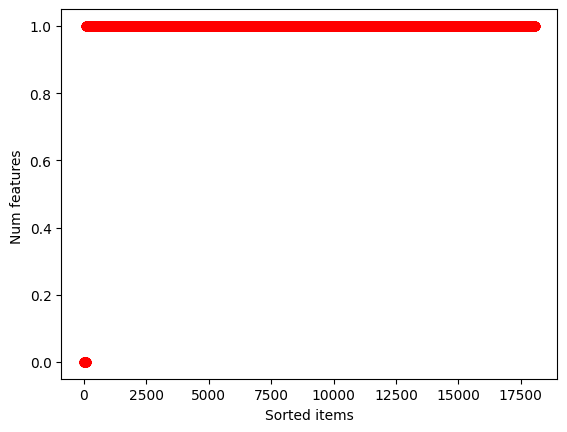

In [18]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(features_per_item, 'ro')
pyplot.ylabel('Num features ')
pyplot.xlabel('Sorted items')
pyplot.show()

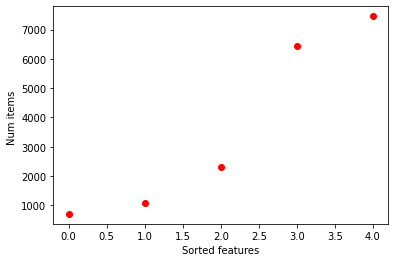

In [19]:
pyplot.plot(items_per_feature, 'ro')
pyplot.ylabel('Num items ')
pyplot.xlabel('Sorted features')
pyplot.show()